In [274]:
# Understand the data
## how results changed over years
## what are strong and weak subjects for students
## performance on science, numerical and humanistic subjects
## gap between advanced and basic level 
# Visualize the data
# Create a dropdown for categories
# Create map of Poland with the passed exams ratio

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [330]:
df_results = pd.read_csv('Data/matura_results.csv')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021')])

<Figure size 432x288 with 0 Axes>

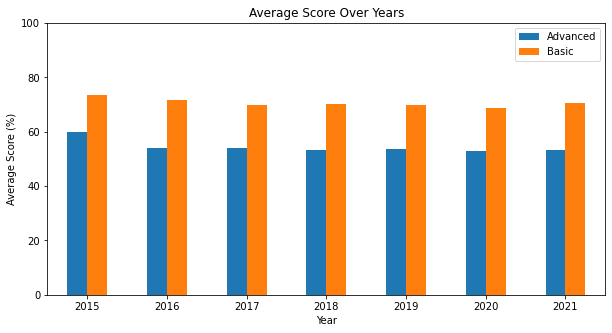

In [335]:
# The scores are stable with slight down-trend
plt.figure()

pd.pivot_table(df_results, values='value_perc', index='year', columns='level').plot(kind='bar', figsize=(10,5))

plt.ylim(0,100)
plt.xlabel('Year')
plt.ylabel('Average Score (%)')
plt.legend(loc='best')
plt.title('Average Score Over Years')
plt.xticks(rotation=0)

In [86]:
pd.pivot_table(df_results, values='value_perc', index='year', columns='gender')

gender,Altogether,Men,Women
year,,,
2015,64.245714,61.434286,64.157143
2016,58.905714,56.062857,61.365714
2017,59.242857,55.342857,60.271429
2018,58.840000,57.325714,56.882857
2019,59.017143,56.997143,59.988571
2020,55.440000,54.462857,56.234286
2021,58.785714,55.665714,59.302857


In [91]:
pd.pivot_table(df_results, values='value_perc', columns='gender', index='subject').sort_values('Men')

gender,Altogether,Men,Women
subject,,,
Lemko,72.028571,24.714286,65.928571
Civics,27.385714,30.114286,25.571429
Geography,32.000000,32.500000,31.585714
Informatics,36.514286,36.342857,38.457143
Biology,36.757143,37.971429,36.385714
Physics,39.157143,39.228571,39.142857
History,37.757143,39.385714,36.042857
History of art,44.485714,39.385714,45.657143
Philosophy,42.128571,40.228571,44.142857


In [94]:
# Looks like Lemko is not popular subject at all
# We need to fill these 0 with mean value of each gender from years where it was not 0
df_results[df_results['value_perc'] == 0]

,level,subject,gender,year,value_perc
80,Advanced,Lemko,Men,2015,0.0
185,Advanced,Lemko,Men,2016,0.0
290,Advanced,Lemko,Men,2017,0.0
371,Advanced,Lemko,Women,2018,0.0
581,Advanced,Lemko,Women,2020,0.0
605,Advanced,Lemko,Men,2020,0.0
629,Advanced,Lemko,Altogether,2020,0.0
710,Advanced,Lemko,Men,2021,0.0


In [198]:
# change 0 value to np.nan
df_results['value_perc'] = df_results['value_perc'].apply(lambda x: np.nan if x == 0 else x)

# get mean of each gender of Lamko subject
mean_men = df_results[ (df_results['value_perc'] != 0) & (df_results['gender'] == 'Men') & 
                      (df_results['subject'] == 'Lemko ')]['value_perc'].mean()

mean_women = df_results[ (df_results['value_perc'] != 0) & (df_results['gender'] == 'Women') & 
                      (df_results['subject'] == 'Lemko ')]['value_perc'].mean()

mean_altogether = df_results[ (df_results['value_perc'] != 0) & (df_results['gender'] == 'Altogether') & 
                      (df_results['subject'] == 'Lemko ')]['value_perc'].mean()

# fill na with mean
df_results.loc[df_results['gender'] == 'Men', 'value_perc'] = df_results[df_results['gender'] == 'Men']['value_perc'].fillna(mean_men)
df_results.loc[df_results['gender'] == 'Women', 'value_perc'] = df_results[df_results['gender'] == 'Women']['value_perc'].fillna(mean_women)
df_results.loc[df_results['gender'] == 'Altogether', 'value_perc'] = df_results[df_results['gender'] == 'Altogether']['value_perc'].fillna(mean_altogether)

In [331]:
# Languages obviously dominate
pd.pivot_table(df_results[df_results['level'] == 'Advanced'], 
               values='value_perc', columns='gender', index='subject').sort_values('Men', ascending=False)

gender,Altogether,Men,Women
subject,,,
Belarusian,99.800000,99.828571,99.800000
Lemko,84.033333,86.500000,92.300000
Lithuanian,81.200000,75.614286,84.671429
Ukrainian,81.285714,74.600000,83.800000
Italian,69.728571,70.957143,69.314286
Russian,63.442857,64.014286,63.128571
French,63.171429,62.614286,63.300000
English,58.885714,59.257143,58.628571
Latin and ancient culture,54.942857,58.642857,53.042857


In [156]:
# Lets group the subjects into 'languages', 'science' and 'humanistic' subjects

languages = ['Lemko ', 'Belarusian', 'Italian ', 'Lithuanian ', 'Ukrainian ',
       'French', 'Spanish ', 'English', 'Russian', 'German',
       'Latin and ancient culture', 'Kashubian',]
sciences = ['Chemistry', 'Maths', 'Physics', 'Biology', 'Informatics', 'Geography']
humanistic = ['Polish ', 'History of music', 'Philosophy', 'History of art', 'History', 'Civics']

def get_catg(subject):
    if subject in languages:
        return 'Languages'
    elif subject in sciences:
        return 'Sciences'
    elif subject in humanistic:
        return 'Humanistic'
    else:
        return np.nan

In [157]:
df_results['category'] = df_results['subject'].apply(get_catg)

<Figure size 432x288 with 0 Axes>

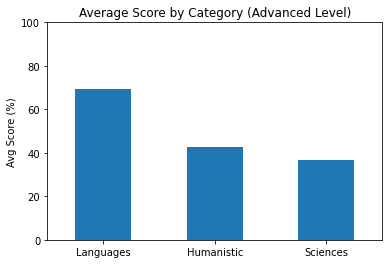

In [229]:
plt.figure()
pd.pivot_table(df_results[(df_results['level'] == 'Advanced') & (df_results['gender'] == 'Altogether')], 
               values='value_perc', columns='gender', index='category').sort_values('Altogether', ascending=False).plot(kind='bar')

plt.xticks(rotation=0)
plt.ylabel('Avg Score (%)')
plt.xlabel('')
plt.title('Average Score by Category (Advanced Level)')
plt.ylim([0, 100])
plt.legend().remove()

<Figure size 432x288 with 0 Axes>

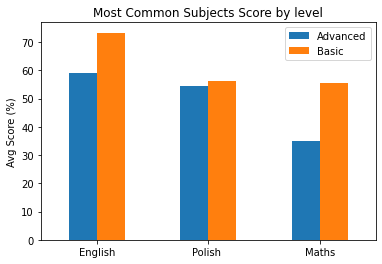

In [287]:
# Let's compare most common subjects at basic and advance levels

df_common = df_results[ (df_results['subject'] == 'Polish ') |
                      (df_results['subject'] == 'Maths') |
                      (df_results['subject'] == 'English')]

plt.figure()
pd.pivot_table(df_common, values='value_perc', columns='level', index='subject').sort_values('Basic', ascending=False).plot(kind='bar')

plt.xticks(rotation=0)
plt.xlabel('')
plt.title('Most Common Subjects Score by level')
plt.ylabel('Avg Score (%)')
plt.legend(['Advanced', 'Basic'])
# print(plt.bar_label())
common_plt = plt.gca()

<Figure size 432x288 with 0 Axes>

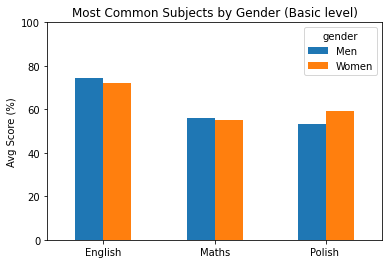

<Figure size 432x288 with 0 Axes>

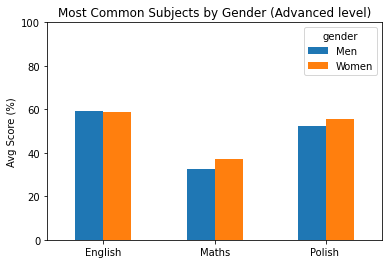

In [327]:
# Let's compare most common subjects at basic and advance levels

for level in df_results['level'].unique():    
    df_common = df_results[ (df_results['subject'] == 'Polish ') |
                          (df_results['subject'] == 'Maths') |
                          (df_results['subject'] == 'English')]
    df_common = df_common[df_common['gender'] != 'Altogether']
    df_common = df_common[df_common['level'] == level]
    
    plt.figure()
    pd.pivot_table(df_common, values='value_perc', columns='gender', index='subject').plot(kind='bar')

    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title('Most Common Subjects by Gender ({} level)'.format(level))
    plt.ylabel('Avg Score (%)')
    plt.ylim(0,100)
    # plt.legend(['Advanced', 'Basic'])
    common_plt = plt.gca()



In [277]:
df_results.to_csv('matura_results.csv')